In [1]:
import numpy as np
import juliacall
jl_main = juliacall.Main

In [2]:
glpde = jl_main.include("../src/GradientLimitPDE.jl")

In [3]:
nodal_source_inner = 0.01;
nodal_source_outer = 0.2;
nodal_psi = 1.;
linear_psi = 1.;

In [4]:
inner_boundary = glpde.createCircleBoundary(20, 0.05, [0.5, 0.5], nodal_source_inner, nodal_psi, linear_psi)
outer_boundary = glpde.createSquareBoundary(5, 1.0, [0., 0.], nodal_source_outer, nodal_psi, linear_psi)

In [5]:
background_grid = glpde.UniformSquareGrid([0., 0.], 1., 512, 0.2)

In [6]:
gradient_limit_pde = glpde.GradientLimitPDE(background_grid, jl_main.Vector([inner_boundary, outer_boundary]))

In [7]:
result = glpde.solve(gradient_limit_pde)

In [8]:
result = np.array(result)
result

array([[0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.2       , 0.19992052, 0.19985038, ..., 0.19985038, 0.19992052,
        0.2       ],
       [0.2       , 0.19985038, 0.1997218 , ..., 0.1997218 , 0.19985038,
        0.2       ],
       ...,
       [0.2       , 0.19985038, 0.1997218 , ..., 0.1997218 , 0.19985038,
        0.2       ],
       [0.2       , 0.19992052, 0.19985038, ..., 0.19985038, 0.19992052,
        0.2       ],
       [0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ]])

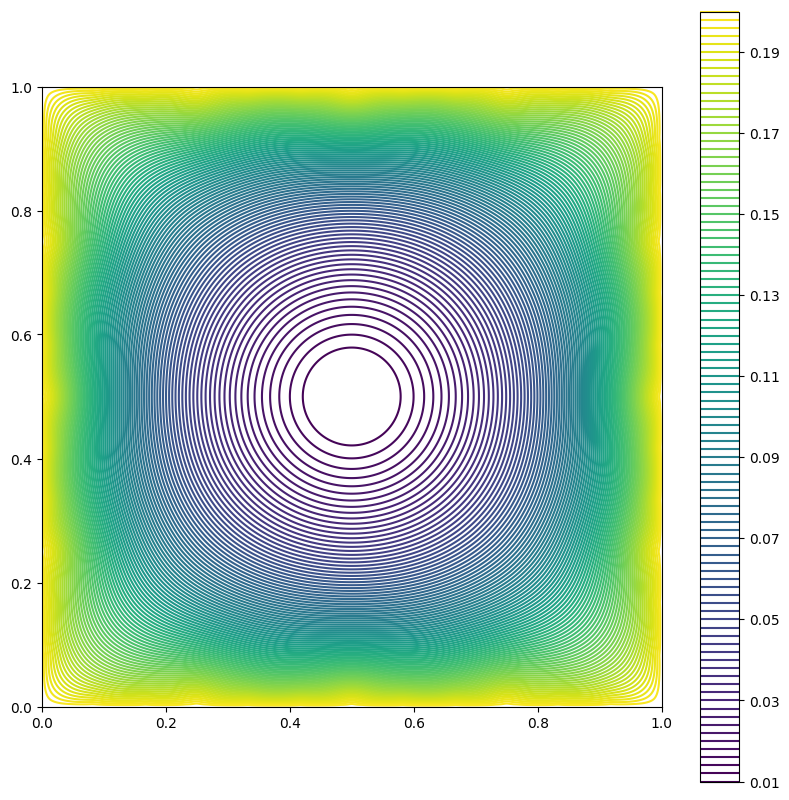

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10), facecolor='w')
plt.gca().set_aspect('equal')
plt.contour(background_grid.x_s, background_grid.y_s, result, 100)
plt.colorbar()
plt.show()